In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from mpl_toolkits.mplot3d import Axes3D

Focal Length Test 1:  793.6046511627907


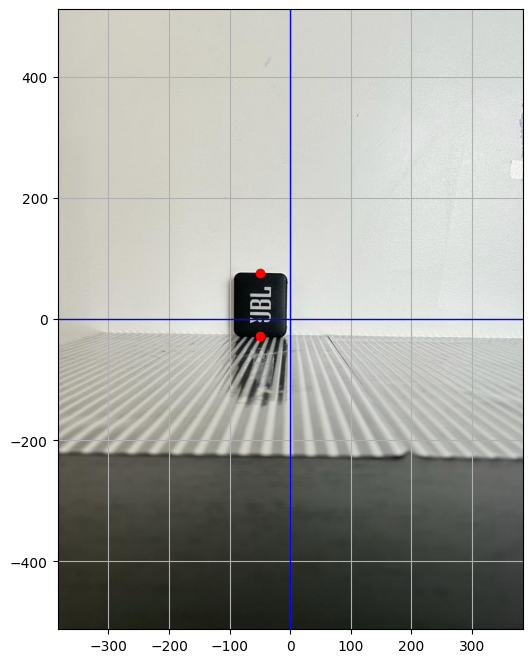

In [ ]:
Z = 650 # 650 mm
X = 86 # 86 mm

test = img.imread('Test1.jpeg')
plt.figure(figsize=(6, 10))
plt.plot([-400, 400], [0, 0], color="blue", linewidth=1)
plt.plot([0, 0], [-600, 600], color="blue", linewidth=1)
plt.plot(-50, 77, marker='o', color="red")
plt.plot(-50, -28, marker='o', color="red")
plt.grid()
plt.imshow(test, extent=[-test.shape[1]/2., test.shape[1]/2., -test.shape[0]/2., test.shape[0]/2. ])

x1 = 105 # 77 - (-28) = 105 pixels
f1 = (x1 * Z) / X # pixels
print('Focal Length Test 1: ', f1)

Focal Length Test 2:  846.5116279069767
Avg Focal Length:  820.0581395348837


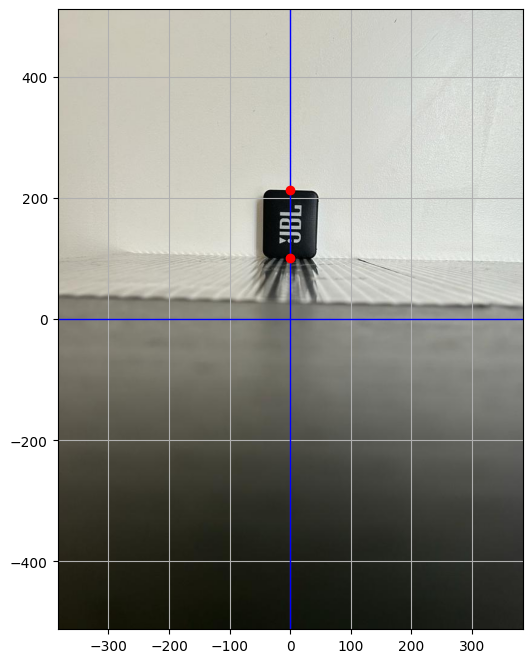

In [ ]:
test = img.imread('Test2.jpeg')
plt.figure(figsize=(6, 10))
plt.plot([-400, 400], [0, 0], color="blue", linewidth=1)
plt.plot([0, 0], [-600, 600], color="blue", linewidth=1)
plt.plot(0, 214, marker='o', color="red")
plt.plot(0, 102, marker='o', color="red")
plt.grid()
plt.imshow(test, extent=[-test.shape[1]/2., test.shape[1]/2., -test.shape[0]/2., test.shape[0]/2. ])

x2 = 112 # 214 - 102 = 112 pixels
f2 = (x2 * Z) / X # pixels
print('Focal Length Test 2: ', f2)

f = (f1 + f2)/2. # Avg focal length in pixels
print('Avg Focal Length: ', f)

In [ ]:
B = 70 # 70 mm
points = [[[-65,-27],[-225,-27]], [[-10,-15],[-160,-15]], [[-63,-199],[-223,-199]], [[232,-83],[-15,-83]], [[290,-70],[68,-70]], [[228,-340],[-13,-340]], [[283,-311],[66,-311]]]

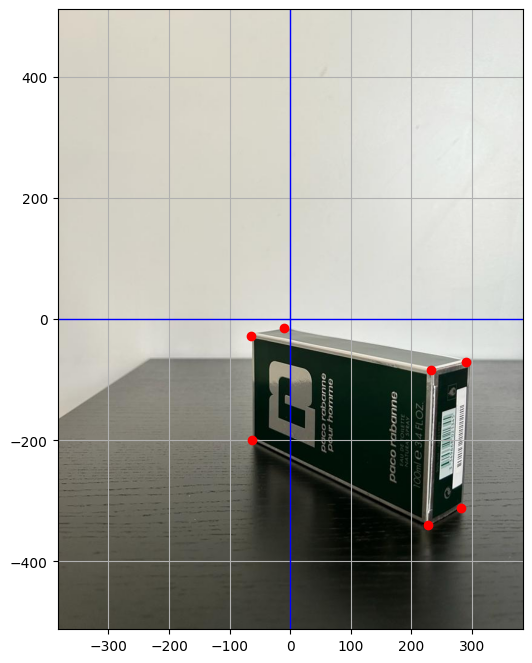

In [ ]:
test = img.imread('Left.jpeg')
plt.figure(figsize=(6, 10))
plt.plot([-400, 400], [0, 0], color="blue", linewidth=1)
plt.plot([0, 0], [-600, 600], color="blue", linewidth=1)
for i in range(len(points)):
  plt.plot(points[i][0][0], points[i][0][1], marker='o', color="red")
plt.grid()
plt.imshow(test, extent=[-test.shape[1]/2., test.shape[1]/2., -test.shape[0]/2., test.shape[0]/2. ])

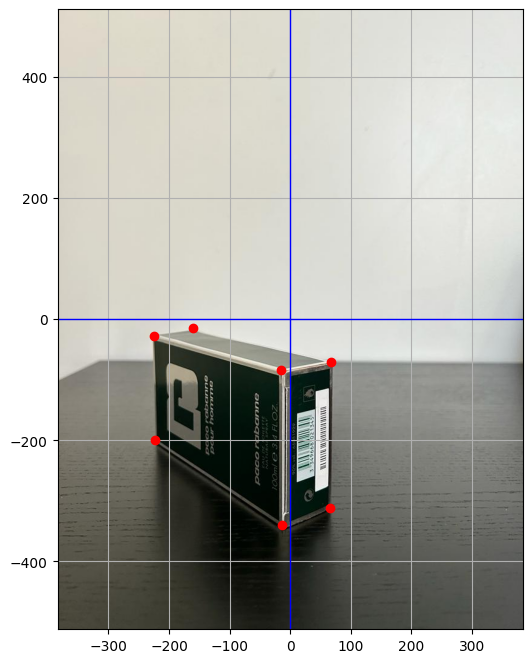

In [ ]:
test = img.imread('Right.jpeg')
plt.figure(figsize=(6, 10))
plt.plot([-400, 400], [0, 0], color="blue", linewidth=1)
plt.plot([0, 0], [-600, 600], color="blue", linewidth=1)
for i in range(len(points)):
  plt.plot(points[i][1][0], points[i][1][1], marker='o', color="red")
plt.grid()
plt.imshow(test, extent=[-test.shape[1]/2., test.shape[1]/2., -test.shape[0]/2., test.shape[0]/2. ])

In [ ]:
def calc_world_coord(B, f, points):
  disparities, world_coordinates = [], []
  for i in range(len(points)):
    left = points[i][0]
    right = points[i][1]
    d = left[0] - right[0]
    disparities.append(d)
    Z = (f * B) / d # mm
    X = (Z * right[0]) / f # mm
    Y = (Z * right[1]) / f #mm
    world_coordinates.append([X,Y,Z])
  return disparities, world_coordinates

In [ ]:
depth = 0
no_points = 7
for i in range(len(points)):
  print(str(i)+' '+str(points[i][0])+' '+str(points[i][1]))
disparities, world_coordinates = calc_world_coord(B, f, points)
print(' ')
for i in range(len(disparities)):
  print(str(i)+' '+str(disparities[i]))
print(' ')
for i in range(len(world_coordinates)):
  print(str(i)+' '+str(world_coordinates[i]))
  depth += world_coordinates[i][2]
depth /= no_points
print('Average depth of object = ', depth)

0 [-65, -27] [-225, -27]
1 [-10, -15] [-160, -15]
2 [-63, -199] [-223, -199]
3 [232, -83] [-15, -83]
4 [290, -70] [68, -70]
5 [228, -340] [-13, -340]
6 [283, -311] [66, -311]
 
0 160
1 150
2 160
3 247
4 222
5 241
6 217
 
0 [-98.4375, -11.812500000000002, 358.77543604651163]
1 [-74.66666666666667, -7.0, 382.6937984496124]
2 [-97.5625, -87.0625, 358.77543604651163]
3 [-4.251012145748987, -23.522267206477732, 232.40514075887393]
4 [21.44144144144144, -22.07207207207207, 258.5768908443327]
5 [-3.7759336099585066, -98.75518672199172, 238.19116086075462]
6 [21.29032258064516, -100.32258064516128, 264.5348837209302]
Average depth of object =  299.136106675361


[(0, 1), (0, 2), (0, 3), (1, 4), (2, 5), (3, 4), (3, 5), (4, 6), (5, 6)]


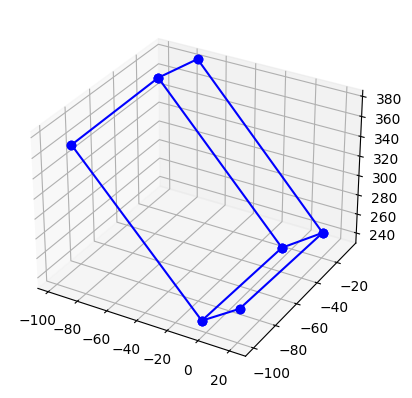

In [ ]:
def plot_3d_lines(ax, points, lines):
  for line in lines:
    x = [points[i][0] for i in line]
    y = [points[i][1] for i in line]
    z = [points[i][2] for i in line]
    ax.plot(x, y, z, marker='o', linestyle='-', color='b')

lines_input = '0,1;0,2;0,3;1,4;2,5;3,4;3,5;4,6;5,6'
lines = [tuple(map(int, line.split(','))) for line in lines_input.split(';')]
print(lines)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_3d_lines(ax, world_coordinates, lines)
plt.show()

In [ ]:
def calc_dimensions(world_coordinates, lines):
  dimensions = []
  for i in lines:
    x1, y1, z1 = world_coordinates[i[0]]
    x2, y2, z2 = world_coordinates[i[1]]
    dim = ((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)**0.5
    dimensions.append(dim)
  return dimensions

In [ ]:
real_dimensions = [32, 77, 146, 146, 146, 32, 77, 77, 32]
edges = 9
err = 0
dimensions = calc_dimensions(world_coordinates, lines)
for i in range(len(dimensions)):
  print(str(real_dimensions[i])+' '+str(dimensions[i]))
  err += abs(real_dimensions[i] - dimensions[i]) / real_dimensions[i]
err /= edges
print('Overall % Error = ', err * 100)

32 34.06318736784883
77 75.25508703735582
146 158.0432367215808
146 157.69889839235742
146 153.20968109126352
32 36.703756480685996
77 75.45658292728568
77 78.47714704278427
32 36.397330358930226
Overall % Error =  6.919684697977273


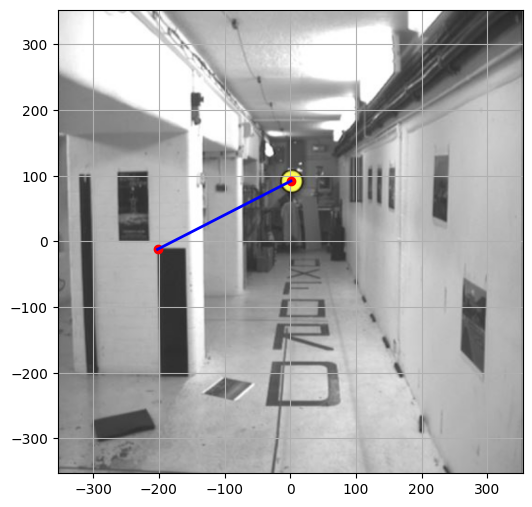

In [ ]:
test = img.imread('3.png')
plt.figure(figsize=(6, 10))
plt.plot(1, 92, marker='o', color="red")
plt.plot(-202, -12, marker='o', color="red")
plt.plot([-202, 1], [-12, 92], color="blue", linewidth=2)
plt.grid()
plt.imshow(test, extent=[-test.shape[1]/2., test.shape[1]/2., -test.shape[0]/2., test.shape[0]/2. ])

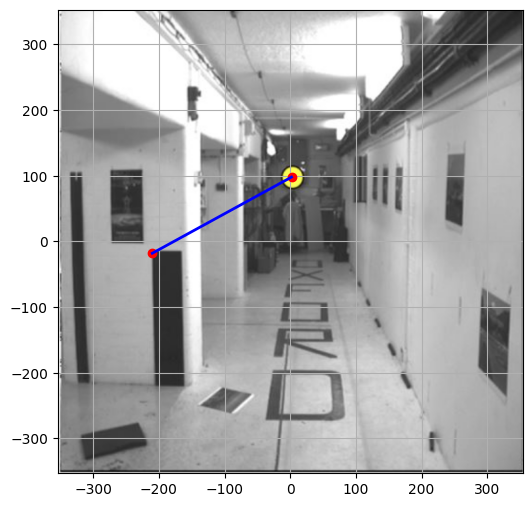

In [ ]:
test = img.imread('4.png')
plt.figure(figsize=(6, 10))
plt.plot(2, 98, marker='o', color="red")
plt.plot(-210, -18, marker='o', color="red")
plt.plot([-210, 2], [-18, 98], color="blue", linewidth=2)
plt.grid()
plt.imshow(test, extent=[-test.shape[1]/2., test.shape[1]/2., -test.shape[0]/2., test.shape[0]/2. ])